In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import graphviz

# Übung 2

### Thema: Bewertung des Potenzials von Nachwuchs-Basketballspielern in der NBA unter Einsatz von Entscheidungsbaum-Lernen

In dieser Übung soll mit Hilfe von Entscheidungbaum-Lernen ein Modell zur Vorhersage erstellt werden, ob ein NBA-Rookie (Spieler in der ersten Profi-Saison) den Durchbruch in der Profiliga schafft und mindestens 5 Jahre in der NBA spielen wird oder nicht. Der Datensatz enthält Daten der Rookie-Saison von verschiedenen Spielern sowie die Zielvariable, ob diese mindestens fünf Jahre in der NBA gespielt haben (`target=1`) oder nicht (`target=0`).

#### Einlesen des NBA-Datensatzes

In [2]:
cols = ['name','games_played', 'minutes_played', 'points_per_game','field_goals_made','field_goal_attempts','field_goals_percent', '3point_made','3point_attempts','3point_percent','free_throw_made','free_throw_attempts','free_throw_percent','offensive_rebounds','defensive_rebounds','rebounds' ,'assists','steals','blocks','turnovers','target']

In [3]:
df = pd.read_csv('nba.csv',names=cols, skiprows=1)

In [4]:
df.isnull().sum()

name                    0
games_played            0
minutes_played          0
points_per_game         0
field_goals_made        0
field_goal_attempts     0
field_goals_percent     0
3point_made             0
3point_attempts         0
3point_percent         11
free_throw_made         0
free_throw_attempts     0
free_throw_percent      0
offensive_rebounds      0
defensive_rebounds      0
rebounds                0
assists                 0
steals                  0
blocks                  0
turnovers               0
target                  0
dtype: int64

#### a) Datenvorbereitung: Imputation

Überprüfen Sie den Datensatz auf fehlende Werte. Wenden Sie ggf. eine geeignete Strategie an, um mit diesen zu verfahren. <br>
Hinweis: vereinfachend werden hier fehlende Werte auf dem gesamten Datensatz vorab behoben. Streng genommen sollte auf dem Trainingsdatensatz eine Imputing-Strategie gefitted werden, die später auf dem Testdatensatz angewendet wird. 

Hinweis: Verwenden Sie die DataFrame-Methoden <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">pandas.DataFrame.dropna</a> bzw.
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html">pandas.DataFrame.fillna</a>

In [5]:
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

name                   0
games_played           0
minutes_played         0
points_per_game        0
field_goals_made       0
field_goal_attempts    0
field_goals_percent    0
3point_made            0
3point_attempts        0
3point_percent         0
free_throw_made        0
free_throw_attempts    0
free_throw_percent     0
offensive_rebounds     0
defensive_rebounds     0
rebounds               0
assists                0
steals                 0
blocks                 0
turnovers              0
target                 0
dtype: int64

#### b) Datenvorbereitung: Entfernung von Duplikaten

Überprüfen Sie, der Datensatz Duplikate enthält, bei denen die Werte "name" und "games_played" jeweils beide übereinstimmen. Falls ja, verwerfen Sie nicht benötigte Zeilen des Datensatzes. Ist das Entfernen von Duplikaten in jeder Situation sinnvoll? Falls nein, warum ist es in dieser Situation sinnvoll?

Hinweis: verwenden Sie die DataFrame-Methode <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html">DataFrame.drop_duplicates</a>

In [7]:
df = df.drop_duplicates(subset=['name', 'games_played'], keep='first')

#### c) Train-Test-Split

Spalten Sie mit Hilfe der Funktion <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> die Zielvariable vom Datensatz ab und teilen Sie die Daten in eine Trainingsdatenmenge und eine Testdatenmenge auf (70% Trainingsdaten, 30% Testdaten). Setzen Sie `random_state=42`, um die Ergebnisse besser mit Kommilitonen vergleichen zu können.

In [8]:
df['target']

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1334    0.0
1336    1.0
1337    0.0
1338    1.0
1339    1.0
Name: target, Length: 1298, dtype: float64

In [9]:
y = df['target']
X = df.drop(['target'], axis=1)
X = X.reset_index(drop=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#### d) Training eines (naiven) DecisionTrees

Machen Sie sich anhand der Doku mit der Klasse <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">DecisionTreeClassifier</a> in scikit-learn vertraut. <br>
- Welche Parameter können eingestellt werden? 
- Welcher Algorithmus für Entscheidungsbaum-Lernen ist in scikit-learn implementiert?
- Worin unterscheidet sich dieser von dem in der Vorlesung besprochenen Algorithmus?

Trainieren Sie nun mit den Default-Einstellungen einen Entscheidungsbaum und werten Sie die Korrektklassifikationsrate durch den Aufruf der Methode `score` auf dem Trainings- und auf dem Testdatensatz aus. Wie interpretieren Sie das Ergebnis?

In [11]:
y_train

632     1.0
865     0.0
962     0.0
587     0.0
441     1.0
       ... 
1135    1.0
1170    1.0
1336    1.0
898     0.0
1166    0.0
Name: target, Length: 908, dtype: float64

In [12]:
df_names = X_test['name']
X_train = X_train.drop(['name'], axis =1)
X_test = X_test.drop(['name'], axis =1)

In [13]:
y_train.count()

908

In [14]:


clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
clf.score(X_test, y_test)

0.6153846153846154

#### e) DecisionTree - Pruning

Wiederholen Sie Teilaufgabe d) unter Verwendung des Parameters `max_depth=3` und vergleichen Sie die Ergebnisse.

In [16]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
clf.score(X_test, y_test)

0.6641025641025641

#### f) Visualisierung des DecisionTrees

Mit dem Paket `graphviz` können DecisionTrees visualisiert werden. Installieren Sie, falls notwendig, das Paket, und visualisieren Sie anschließend den DecisionTree aus Teilaufgabe e), indem Sie wie <a href="https://scikit-learn.org/stable/modules/tree.html">hier</a> vorgehen.

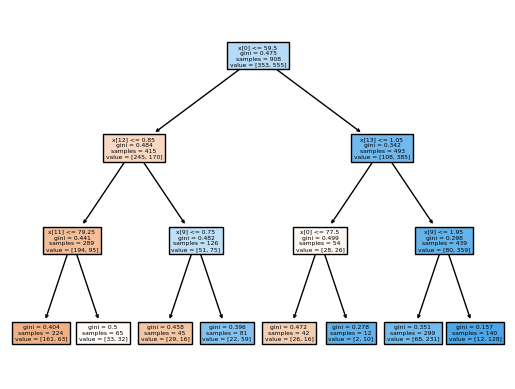

In [18]:
tree.plot_tree(clf, filled = True);

#### g) Skalierung der Daten beim DecisionTree

Welchen Einfluss hat eine Reskalierung der Daten beim DecisionTree? Überprüfen Sie Ihre Antwort, indem Sie eine Standardisierung mit Hilfe eines <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandardScalers</a> durchführen und das Modell aus Teilaufgabe e) erneut trainieren und auswerten.

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [20]:
scaler.scale_

array([16.93107892,  7.99236296,  4.28108253,  1.63531458,  3.41084461,
        6.33506428,  0.39579114,  1.09525307, 16.79833122,  0.99400521,
        1.28801436, 11.30481782,  0.80114645,  1.3704085 ,  2.0909401 ,
        1.38696486,  0.37650631,  0.49939766,  0.66803061])

In [21]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
clf.score(X_test, y_test)

0.6615384615384615

genau gleich, weil umskalierung fuer Decision Trees nichts bringt. Es wird ja immer nur ein Attribut unabhaengig von anderen betrachtet. Ob <1 oder <10 spielt keine Rolle.

#### h) Berechnung des Scores

Ermitteln Sie mit Hilfe der Methode `predict_proba` die 50 Spieler aus dem Testdatensatz mit dem höchsten Score. Dieser ergibt sich für jede Instanz durch die relativen Klassenhäufigkeiten im entsprechenden Blatt. Wie hoch ist die Korrektklassifikationsrate auf dieser Teilmenge aus 50 Spielern?

In [23]:
predictions = clf.predict_proba(X_test)
print(predictions)

[[0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.50769231 0.49230769]
 [0.64444444 0.35555556]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.50769231 0.49230769]
 [0.08571429 0.91428571]
 [0.22742475 0.77257525]
 [0.71875    0.28125   ]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.71875    0.28125   ]
 [0.71875    0.28125   ]
 [0.61904762 0.38095238]
 [0.50769231 0.49230769]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.08571429 0.91428571]
 [0.71875    0.28125   ]
 [0.71875    0.28125   ]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.64444444 0.35555556]
 [0.71875    0.28125   ]
 [0.71875    0.28125   ]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]
 [0.27160494 0.72839506]
 [0.61904762 0.38095238]
 [0.27160494 0.72839506]
 [0.71875    0.28125   ]
 [0.08571429 0.91428571]
 [0.22742475 0.77257525]
 [0.22742475 0.77257525]


In [24]:
prob_zero = []
prob_one = []
for arr in predictions:
    prob_zero.append(arr[0])
    prob_one.append(arr[1])

In [25]:
d = {'0': prob_zero, '1': prob_one}
df_proba = pd.DataFrame(data = d)

In [36]:
names = df_names.to_numpy()

In [37]:
df_proba['name'] = names

In [38]:
df_proba

,0,1,name
0,0.227425,0.772575,Stephen Jackson
1,0.227425,0.772575,DeQuan Jones
2,0.227425,0.772575,Alan Henderson
3,0.227425,0.772575,George Hill
4,0.227425,0.772575,Austin Rivers
...,...,...,...
385,0.227425,0.772575,Shelden Williams
386,0.271605,0.728395,Jordan Clarkson
387,0.227425,0.772575,Brandon Rush
388,0.718750,0.281250,Demetris Nichols


Ergebnis

In [43]:
df_proba.nlargest(50, '1')

,0,1,name
11,0.085714,0.914286,David Robinson*
22,0.085714,0.914286,Joe Smith
37,0.085714,0.914286,Jonny Flynn
44,0.085714,0.914286,Michael Beasley
46,0.085714,0.914286,Travis Mays
52,0.085714,0.914286,Anthony Peeler
69,0.085714,0.914286,Anthony Davis
74,0.085714,0.914286,Ralph Sampson*
75,0.085714,0.914286,Kenny Walker
78,0.085714,0.914286,Chauncey Billups
